### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

###### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [511]:
ava=pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\avocado.csv")
ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [512]:
ava.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [513]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [514]:
ava.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [515]:
ava.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

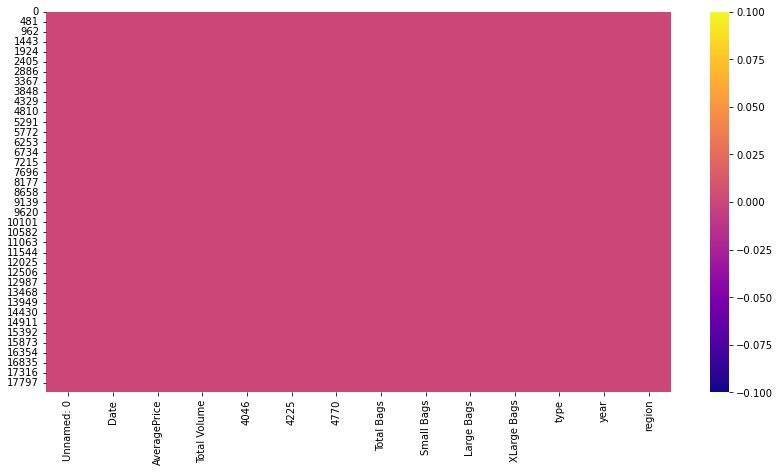

In [516]:
plt.figure(figsize=[14,7])
sns.heatmap(ava.isnull(),cmap='plasma')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is  18249 * 14 i.e. no. of rows are 18249 and no. of columns are 14(including target).

2) Out of 13 columns 3 columns are continuous in nature and rest 11 are numeric type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap so there is no need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

#### The dataset can be seen in two angles

   #### 1.To find the region(Target- region).
    
   #### 2.To find the average price(Target-average price) .

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

### EDA process will be same in both the conditions till the starting of preprocessing part.

<AxesSubplot:xlabel='count', ylabel='region'>

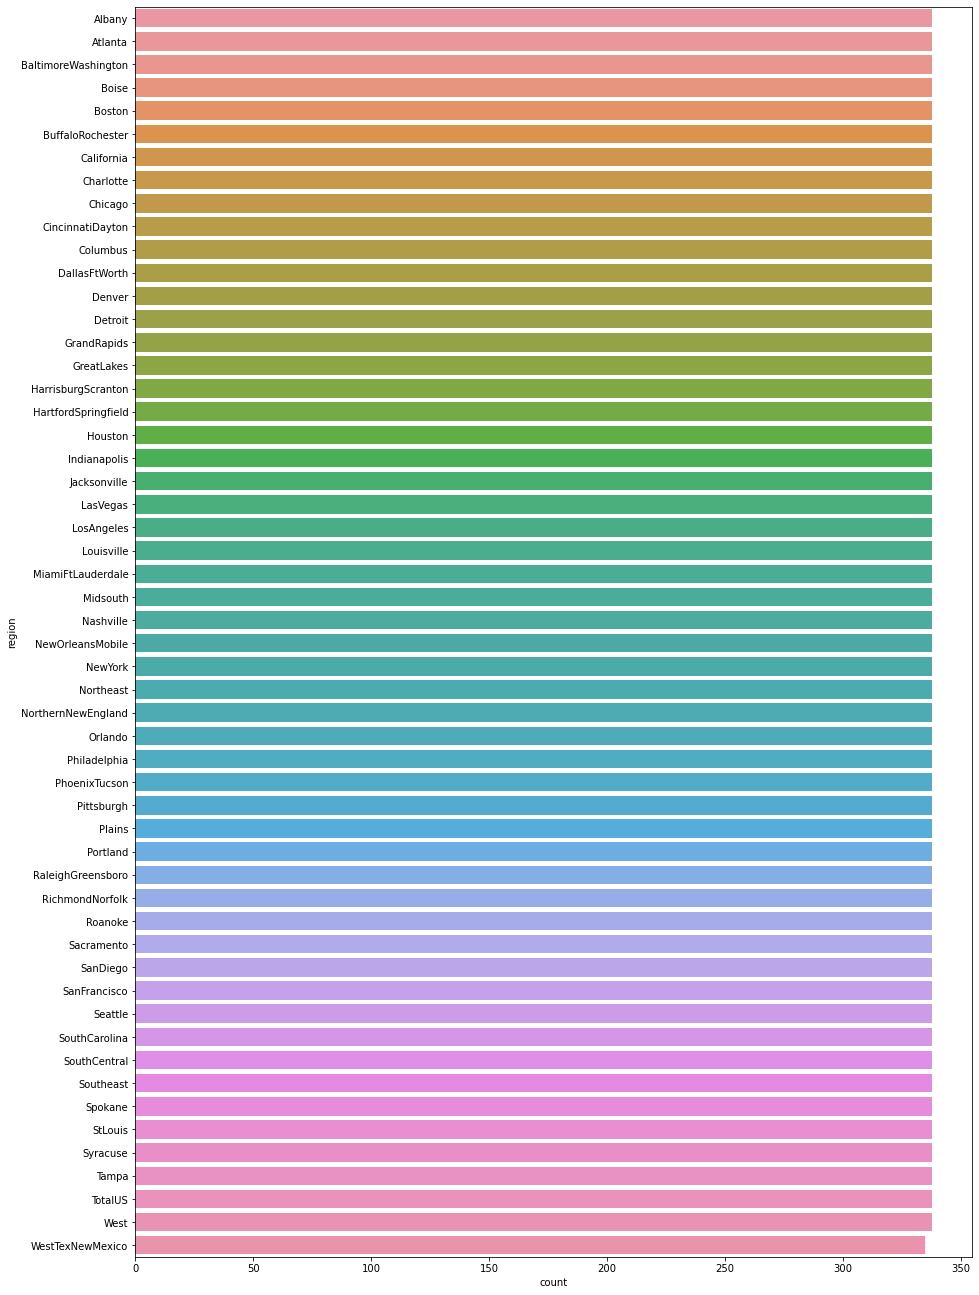

In [517]:
plt.figure(figsize=[15,23])
sns.countplot(y=ava['region'])   

conventional    9126
organic         9123
Name: type, dtype: int64


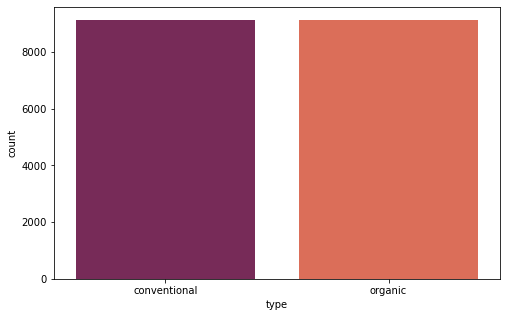

In [518]:
print(ava['type'].value_counts())   
plt.figure(figsize=[8,5])
sns.countplot(ava['type'],palette='rocket')
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:ylabel='year'>

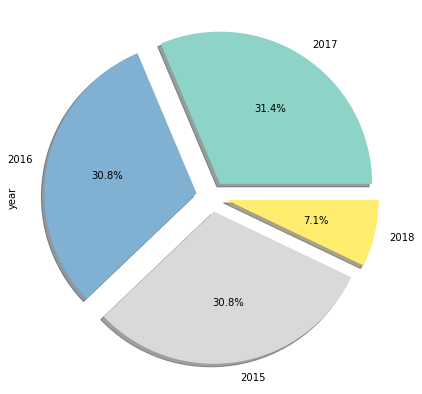

In [519]:
print(ava['year'].value_counts())

ava.year.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',cmap='Set3',figsize=(7,7))

<AxesSubplot:xlabel='year', ylabel='count'>

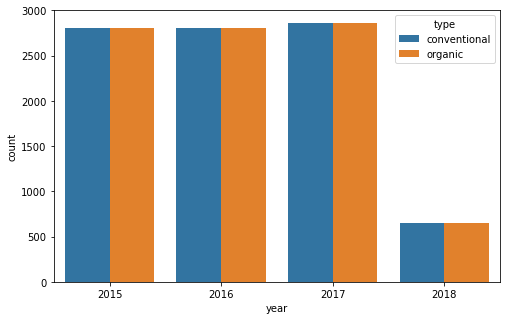

In [520]:
plt.figure(figsize=[8,5])
sns.countplot(ava["year"], hue=ava["type"])

### Observation-2

From the above result we can conclude that--

1. In region column, 54 types of regions are present, no of occurrence of every region is 338 except WestTexNewMexico region.
Number of ouuurrence of WestTex NewMexico region is 335.

2. Their are two types of Avacodo present in the columns : Conventional and organic.
    Number of conventional avacodo is 9126 and number of organic avacodo is 9123.
    

3. Total number of years are 4 which we have in the list.

A. In the year 2017 the sell of avocodo is higher(31.4%) as compare to others.

B. In the year 2015 and 2016 the total number of avacodo sell(30.8%) is alomost equal.

C. In the year 2018 the sell of avacodo is very less i.e. 7.1%.




## Adopting Encoding technique

In [521]:
from sklearn.preprocessing import LabelEncoder

In [522]:
le=LabelEncoder()

In [523]:
ava['region']=le.fit_transform(ava['region'])

In [524]:
ava['type']=le.fit_transform(ava['type'])

In [525]:
ava['year']=le.fit_transform(ava['year'])

## Dropping Columns

Droping unnecessary column named - Unnamed:0

We are dropping date column because it will not help us to predict the target.

In [526]:
ava.drop(['Unnamed: 0'],axis=1,inplace=True)

In [527]:
ava.drop(['Date'],axis=1,inplace=True)

## Checking Outliers

In [528]:
ava.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

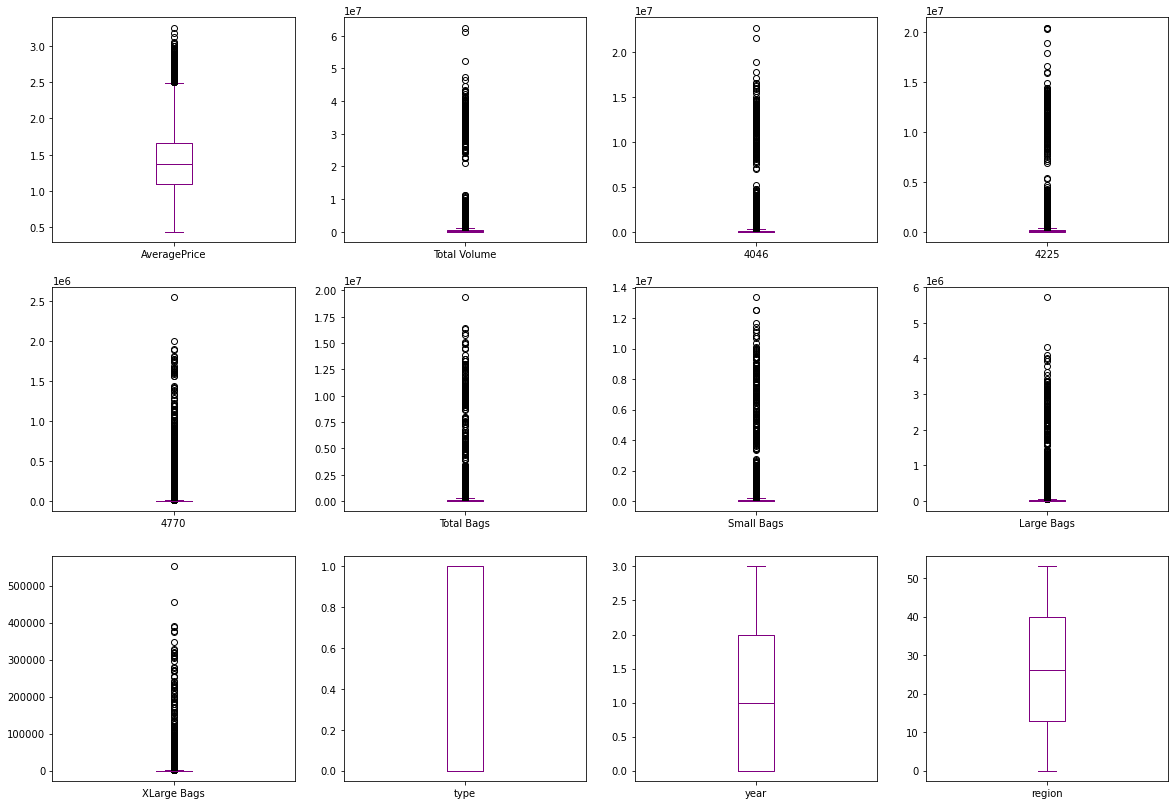

In [529]:
ava.plot(kind='box',subplots=True,layout=[4,4],figsize=[20,19],color='Purple')

### Observation-3

From the above result we can say that all the columns have outliers except type, year and region columns.

1. In xlarge bag column many outliers are present as we can see the diffrence between mean and standard daviation is too large and the diffrence between 75%tile and maximum value is also high.


2. Similarly in the Small bags, large bags and total bags columns outliers are present.


3. Total bags, total volume and average price columns shows that large amount of outliers are present in these columns.

## Checking skewness 

In [530]:
from scipy.stats import skew

In [531]:
ava.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

AveragePrice
0.5802550380696565


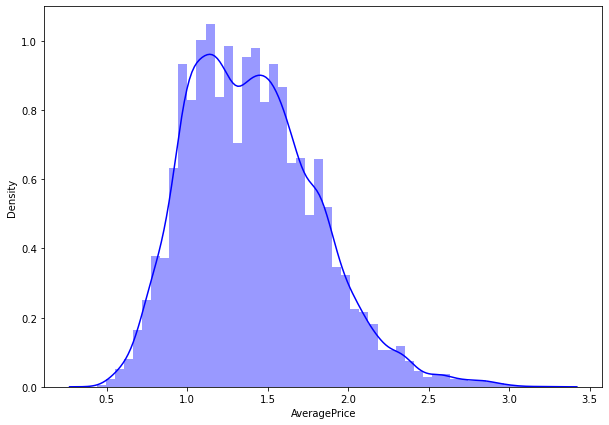

Total Volume
9.006947063504116


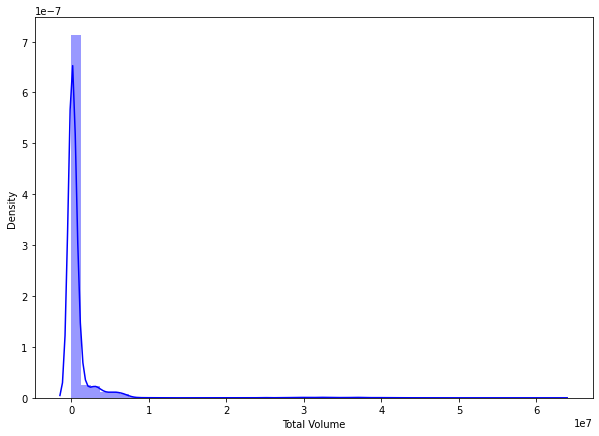

4046
8.647508889260688


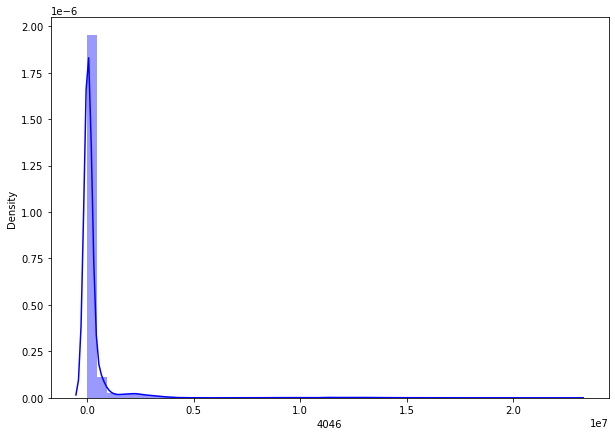

4225
8.941730553303788


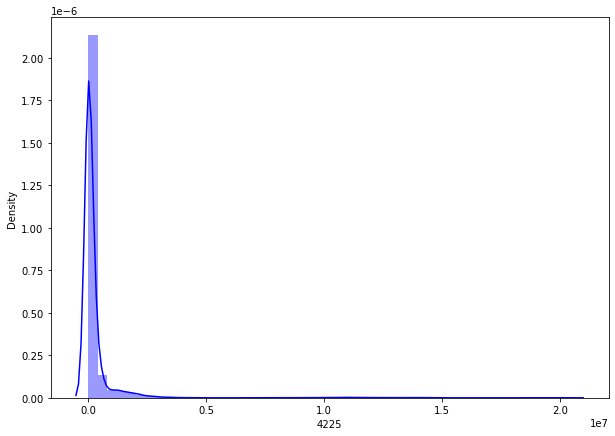

4770
10.158560543509228


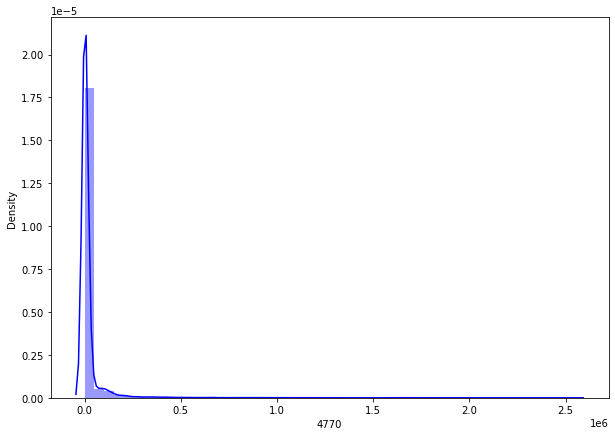

Total Bags
9.755269739145234


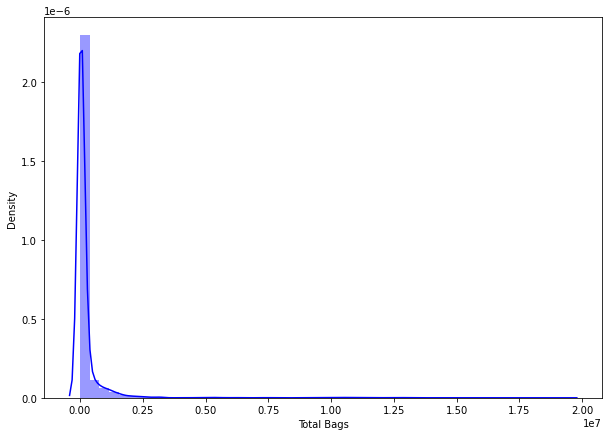

Small Bags
9.539875757048327


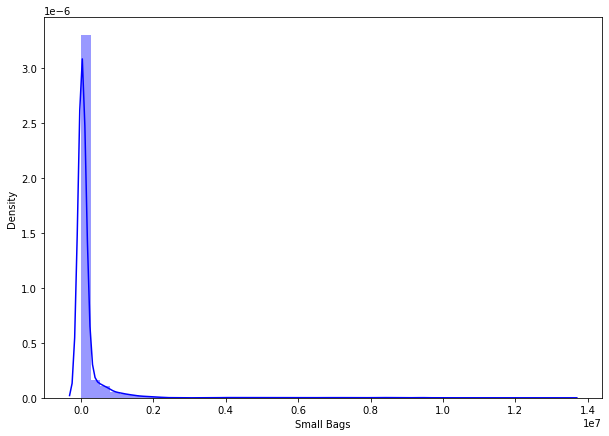

Large Bags
9.79564934814773


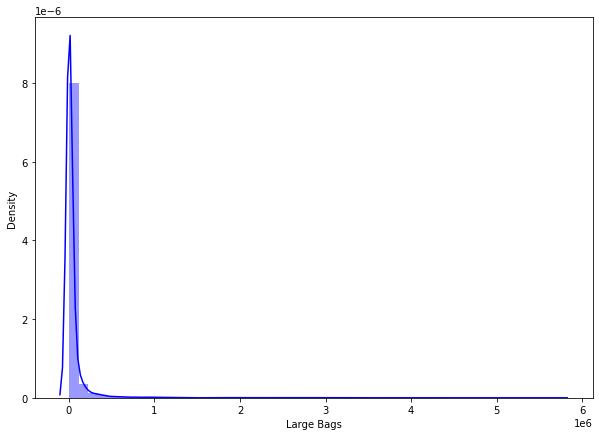

XLarge Bags
13.138670622657223


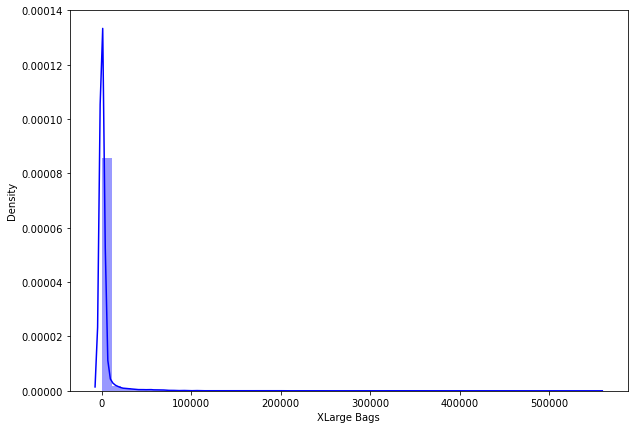

type
0.000328785143354492


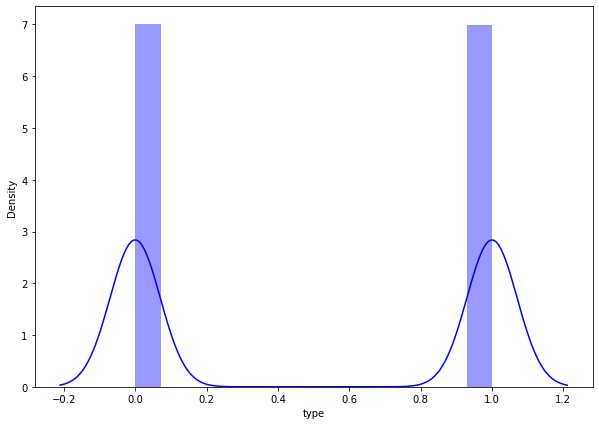

year
0.2153209863093783


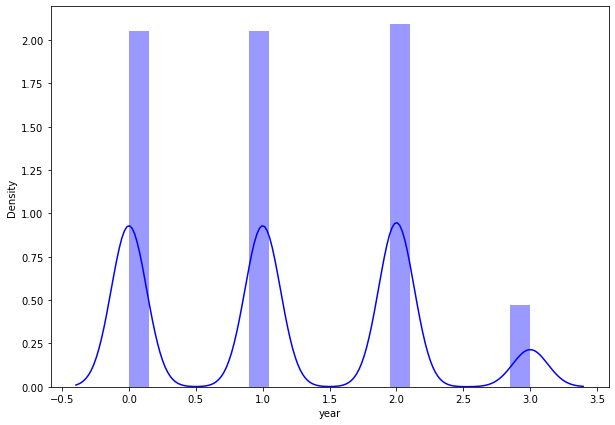

region
3.0245546103952823e-05


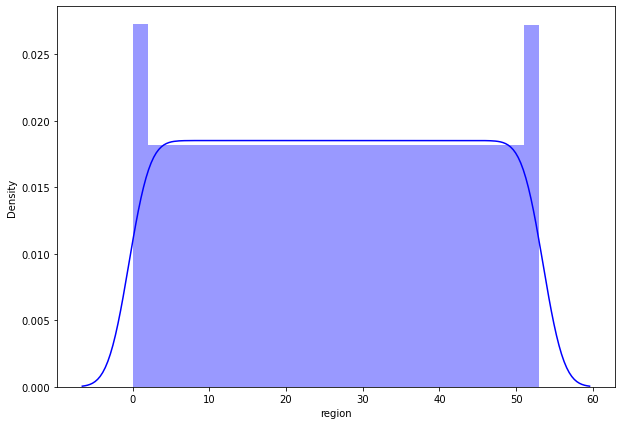

In [532]:
for i in ava:
    print(i)
    print(skew(ava[i]))
    
    plt.figure(figsize=(10,7))
    sns.distplot(ava[i],color='b')
    plt.show()

## Observation-4

From the above results we can conclude that 


1. In the type, year and region columns skewness is not present i.e. data are normally distributed in these columns.


2. Xlarge column has highest skewness(13.13) as compare to other columns.


3. 4770(10.15), large bags(9.79) and total bags(9.75) colums has high skewness as well.


4. Total volume(9), small bags(9.54), 4225(8.94) and 4046(8.64) colums are not equally distributed and have skewed data.

## Checking Correlation

### We will check Correlation in 3 ways:
    
   #### 1. Correlation of Region(Target) with other columns.(In the case of classification)
   #### 2. Correlation of Average price(Target) with other colums.(In the case of regression)
   #### 3. Correlation between the columns.
    

.

.

#### 1. Correlation of Region(Target) with other columns.(In the case of classification)

In [533]:
ava.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

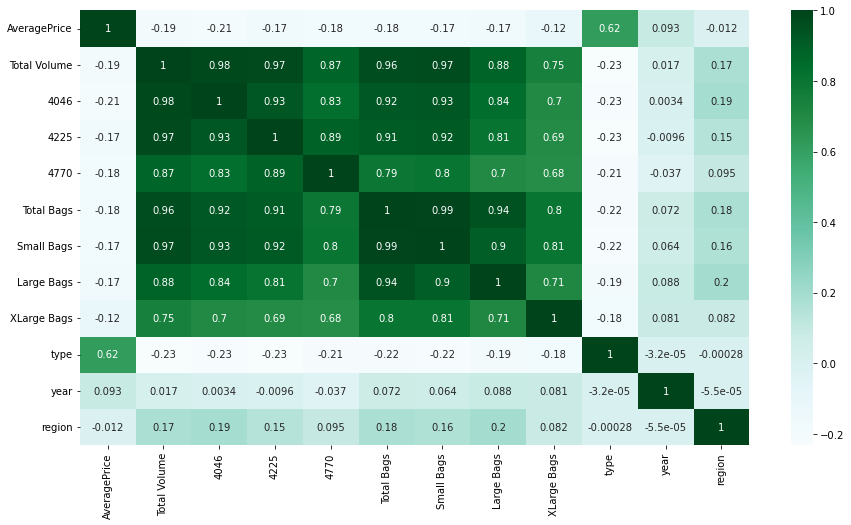

In [534]:
plt.figure(figsize=[15,8])
sns.heatmap(ava.corr(),annot=True,cmap='BuGn')
plt.show()

<AxesSubplot:>

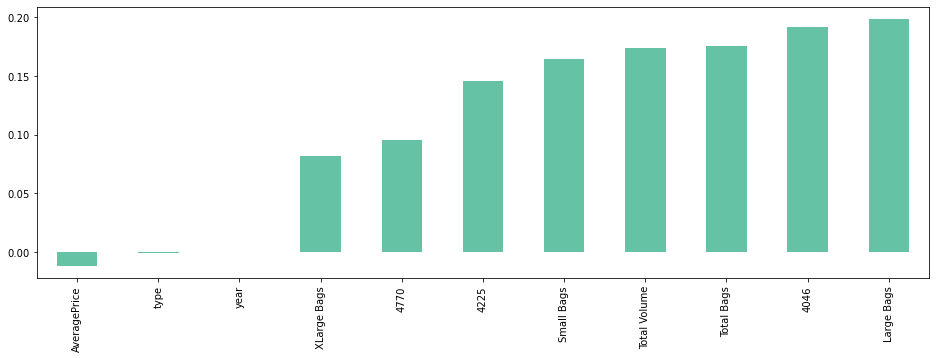

In [535]:
plt.figure(figsize=[16,5])
ava.corr()['region'].sort_values().drop(['region']).plot(kind='bar',cmap='Set2')

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

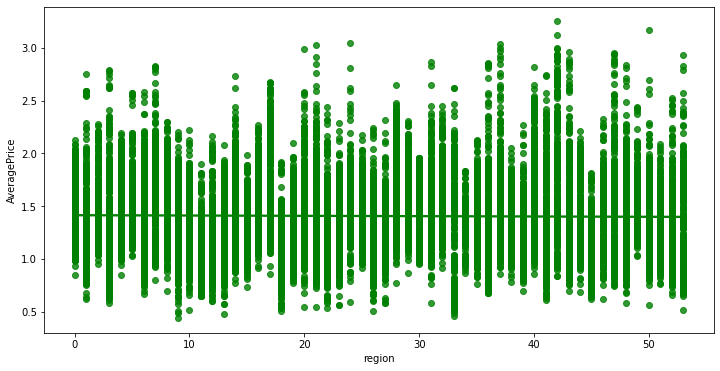

In [536]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='region',y='AveragePrice',color='g') 

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

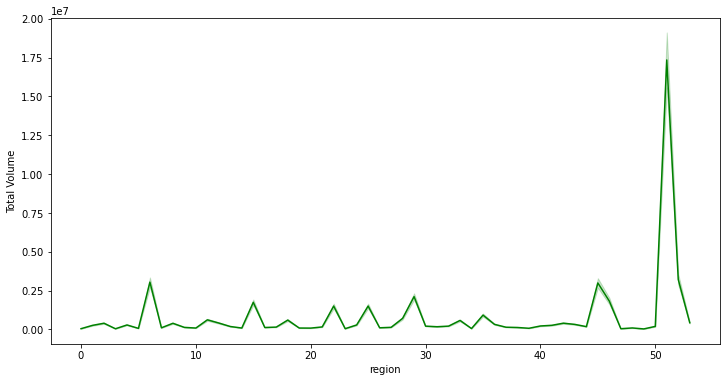

In [537]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='region',y='Total Volume',color='g')

<AxesSubplot:xlabel='region', ylabel='type'>

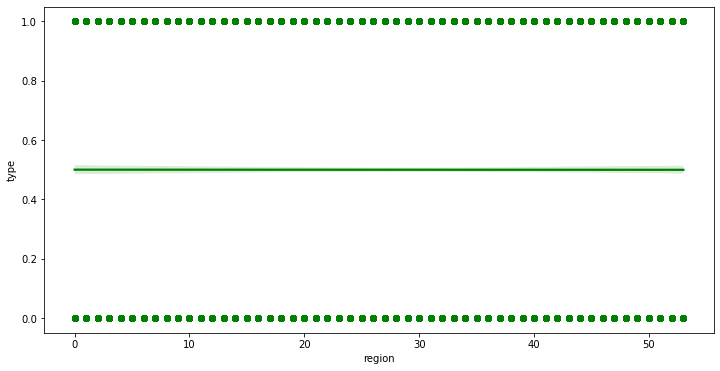

In [538]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='region',y='type',color='g')

<AxesSubplot:xlabel='region', ylabel='Total Bags'>

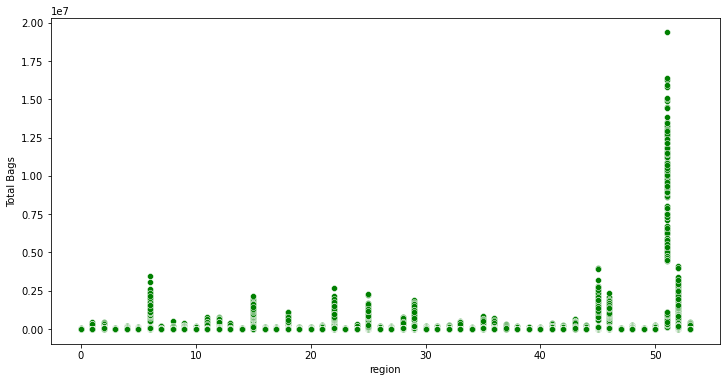

In [539]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='region',y='Total Bags',color='g')

<AxesSubplot:xlabel='region', ylabel='4046'>

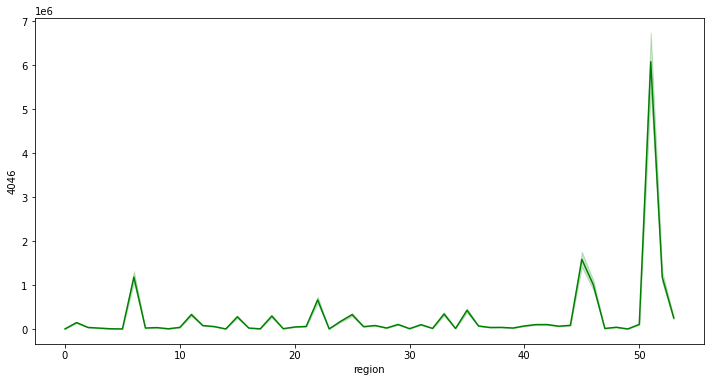

In [540]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='region',y='4046',color='g')

<AxesSubplot:xlabel='region', ylabel='Large Bags'>

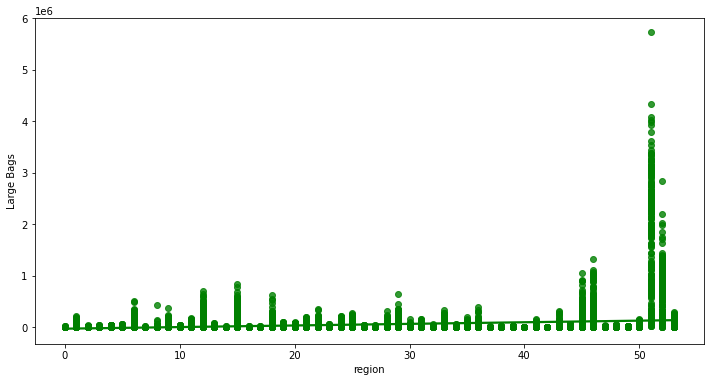

In [541]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='region',y='Large Bags',color='g')

### Observation-5

From the above graph we can conclude that(When target=region):

1. Large bags, 4046, total bags, total volume, small bags, 4225,xlarge bags and 4770 columns have positive relationship with target region.


2. Type, year and Average price columns have zero correlation with target region as we can see in the regplot.


3. Has negative correlation with the target column.


4. Region and target columns shows that the total volume is highest in the Westtext newmaxico, west ,total US and tampa region.


5. Both the type of avocado i.e. organic and convential are being sold in all the region equally.


6. The sell of total bags of avocado are being sold higher in Westtext newmaxico, west ,total US and tampa region as compare to others.


7. Similarly The 4046 column range is higher in Westtext newmaxico, west ,total US and tampa region as compare to others.


8. Total volume of avocado is higher in the region Westtext newmaxico, west ,total US and tampa. And average in Buffalo rochester, california,newyork, northeast, stlouis and syracuse regions. And small is other regions.

#### 2. Correlation of Average price(Target) with other colums.(In the case of regression)

In [542]:
ava['Target2_AveragePrice']=ava['AveragePrice']

In [543]:
ava.drop(['AveragePrice'],axis=1,inplace=True)

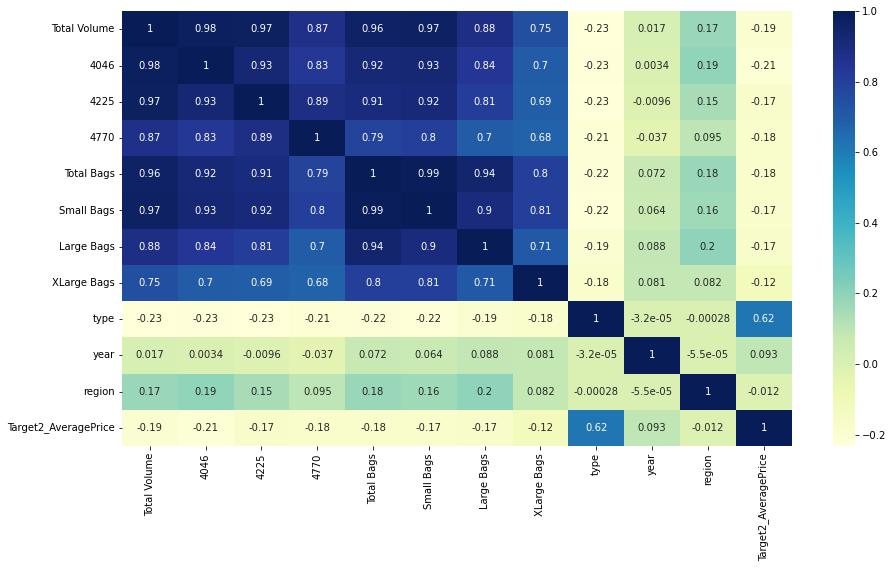

In [544]:
plt.figure(figsize=[15,8])
sns.heatmap(ava.corr(),annot=True,cmap='YlGnBu')
plt.show()

<AxesSubplot:>

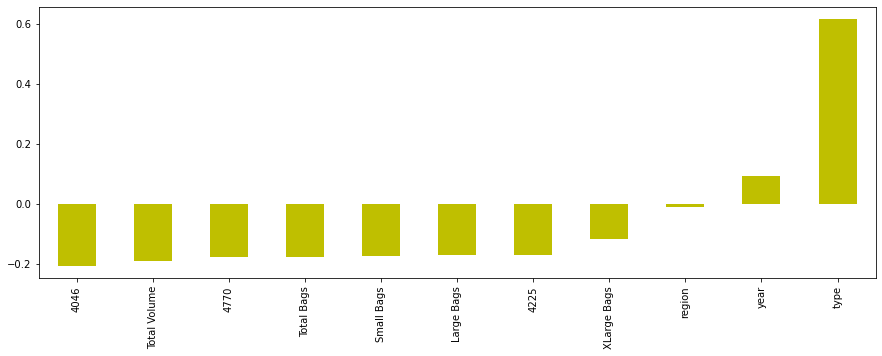

In [545]:
plt.figure(figsize=[15,5])
ava.corr()['Target2_AveragePrice'].sort_values().drop(['Target2_AveragePrice']).plot(kind='bar',color='y')

<AxesSubplot:xlabel='Target2_AveragePrice', ylabel='Total Bags'>

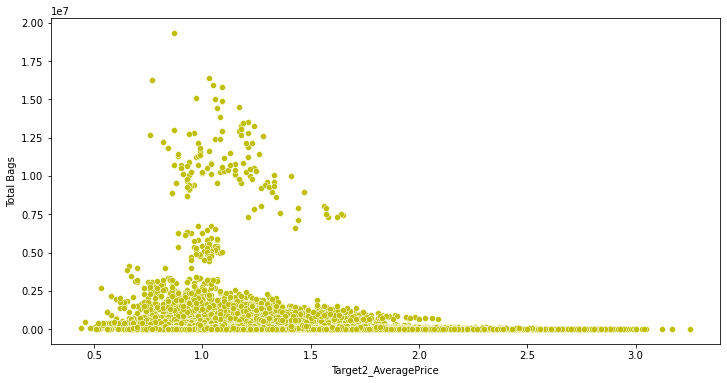

In [546]:
plt.figure(figsize=[12,6])    
sns.scatterplot(data=ava,x='Target2_AveragePrice',y='Total Bags',color='y')

<AxesSubplot:xlabel='Target2_AveragePrice', ylabel='region'>

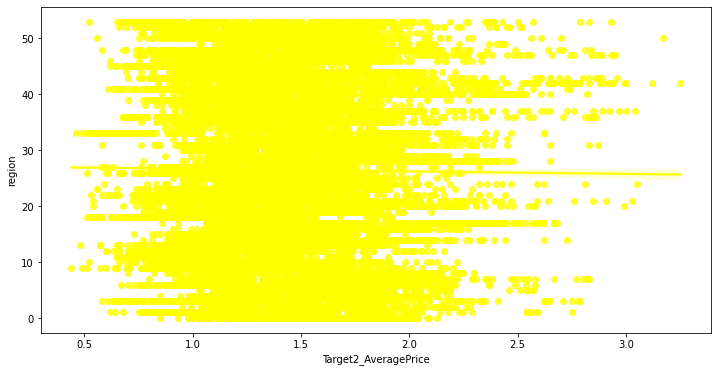

In [547]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='Target2_AveragePrice',y='region',color='yellow')

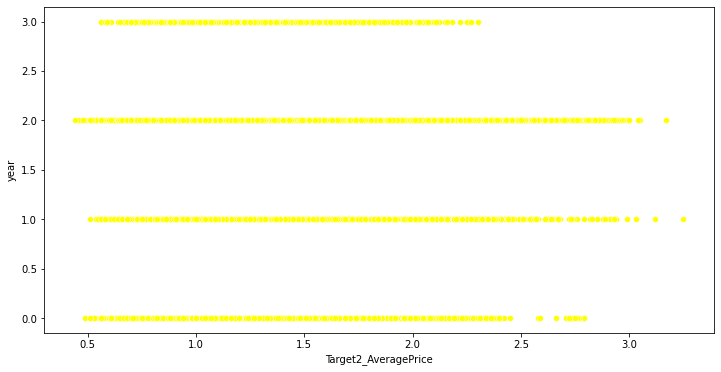

In [548]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='Target2_AveragePrice',y='year',color='yellow')
plt.show()

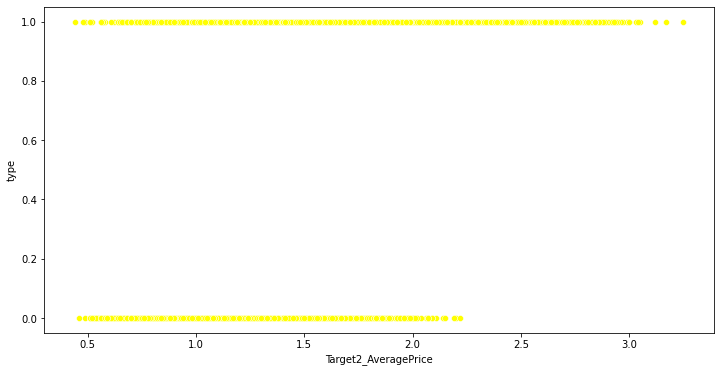

In [549]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='Target2_AveragePrice',y='type',color='yellow')
plt.show()

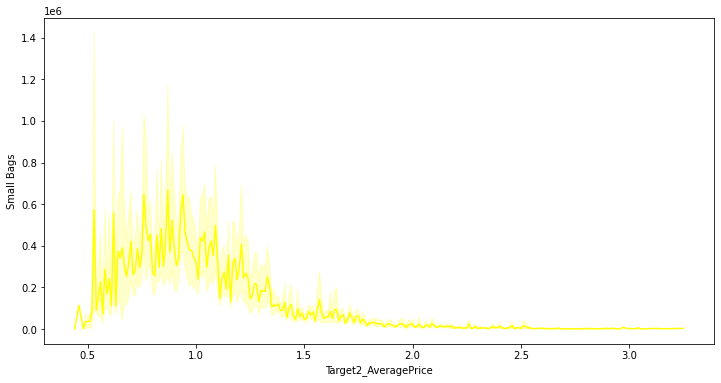

In [550]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='Target2_AveragePrice',y='Small Bags',color='yellow')
plt.show()

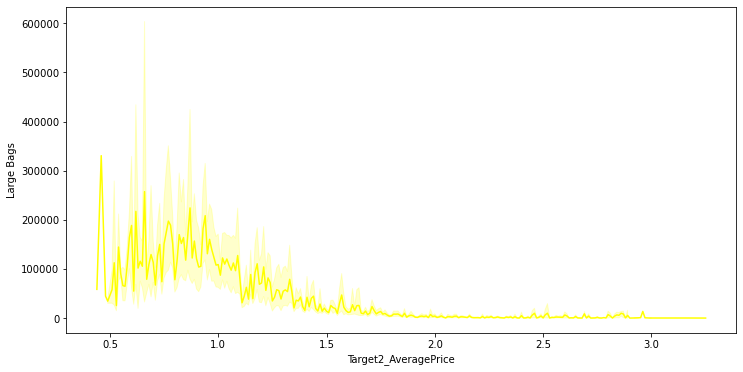

In [551]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='Target2_AveragePrice',y='Large Bags',color='yellow')
plt.show()

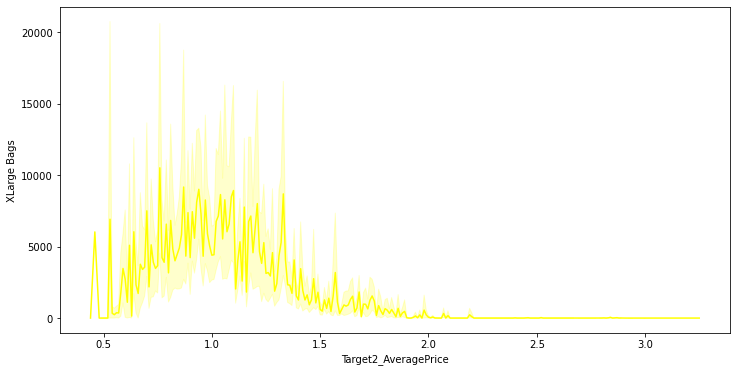

In [552]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='Target2_AveragePrice',y='XLarge Bags',color='yellow')
plt.show()

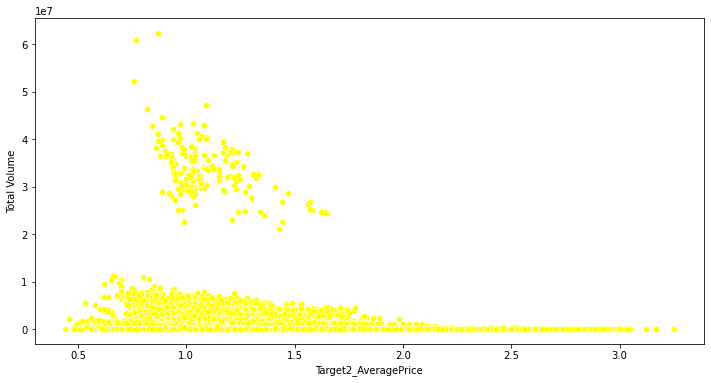

In [553]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='Target2_AveragePrice',y='Total Volume',color='yellow')
plt.show()

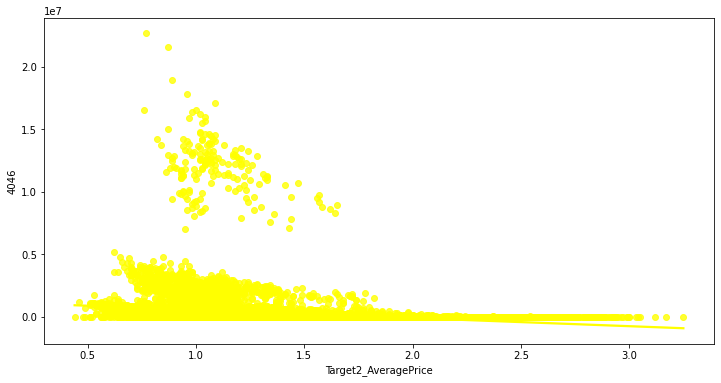

In [554]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='Target2_AveragePrice',y='4046',color='yellow')
plt.show()

### Observation-6

From the above graph we can say that (when target=AveragePrice)

1. 4046, Total volume, 4770, total bags, small bags, large bags, 4225 and xlarge bags columns are negative correleted with target column.


2. year and type columns are positive correleted with target column.


3. Type columns is highly correleted(0.62) with target columns and the regplot shows that the total average price of organic avocado is high as compare to conventional avocado.


4. 0.5 to 1.5 total amount increased with arerage price then started declining.


5. The sell of small begs of avocado was high(around 0.8-1) when the average price is in between 0.5 to 1.5.


6. The sell of large begs of avocado was high around 300000 when the average price is in between 0.5 to 1.5.


7. Similarly the sell of xlarge begs is higher around 15000 when the average price is in between 0.5 to 1.5.


8. The sell of avocado was higher in 2017 and 2016 year and the sell was less 2014 and 2018.


9. The average price of avocado i.e. 1.0 to 2.0, is same in all the region.


### 3. Correlation between the columns

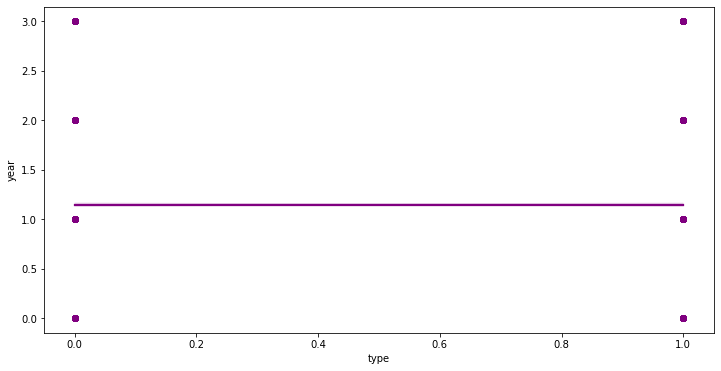

In [555]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='type',y='year',color='purple')
plt.show()

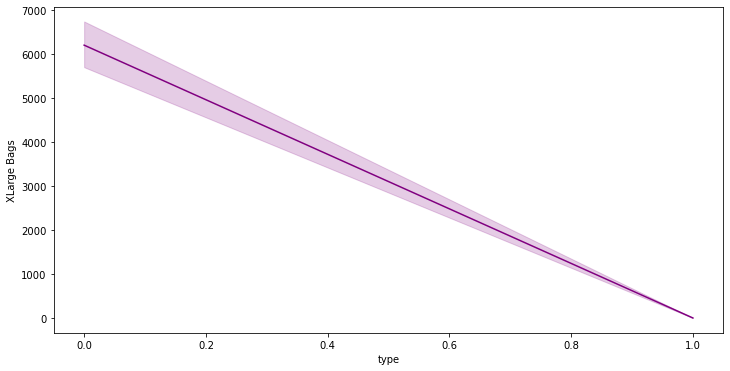

In [556]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='type',y='XLarge Bags',color='purple')
plt.show()

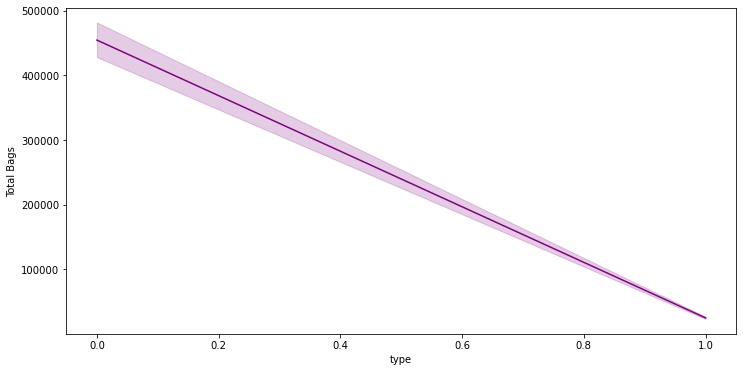

In [557]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='type',y='Total Bags',color='purple')
plt.show()

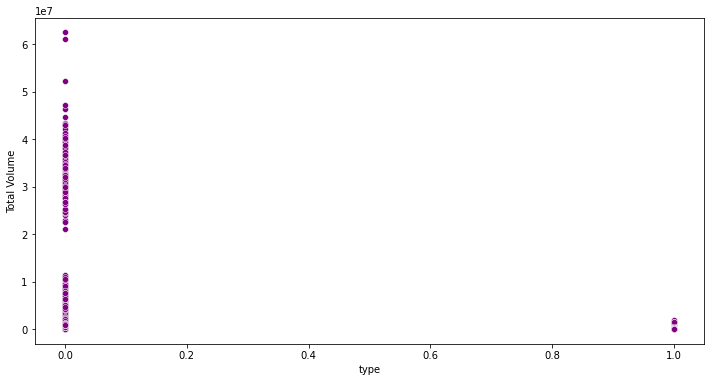

In [558]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='type',y='Total Volume',color='purple')
plt.show()

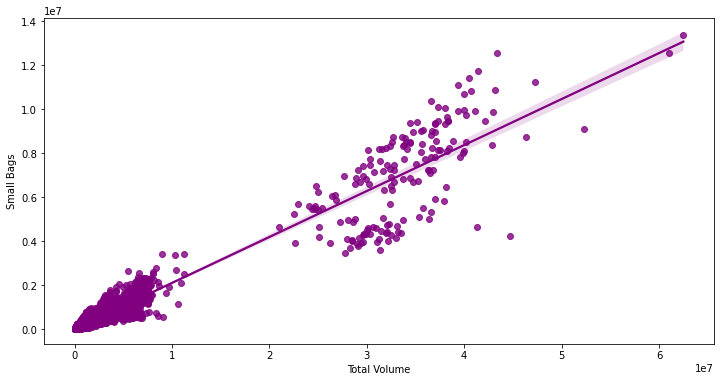

In [559]:
plt.figure(figsize=[12,6])
sns.regplot(data=ava,x='Total Volume',y='Small Bags',color='purple')
plt.show()

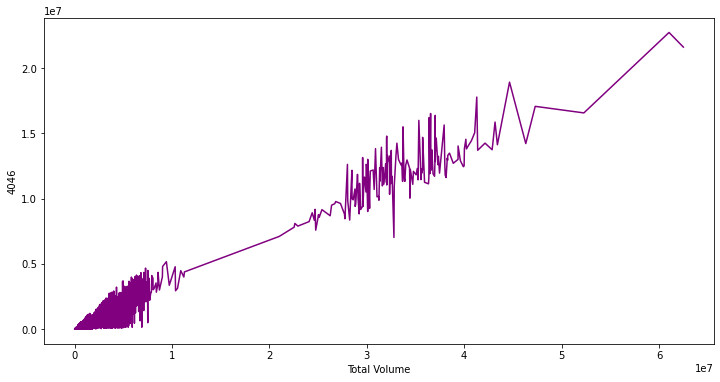

In [560]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='Total Volume',y='4046',color='purple')
plt.show()

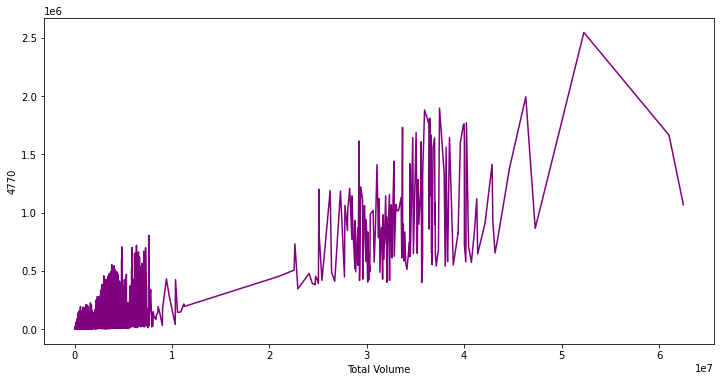

In [561]:
plt.figure(figsize=[12,6])
sns.lineplot(data=ava,x='Total Volume',y='4770',color='purple')
plt.show()

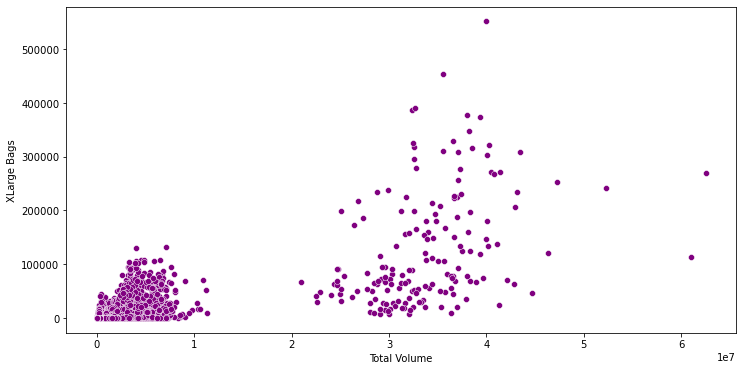

In [562]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='Total Volume',y='XLarge Bags',color='purple')
plt.show()

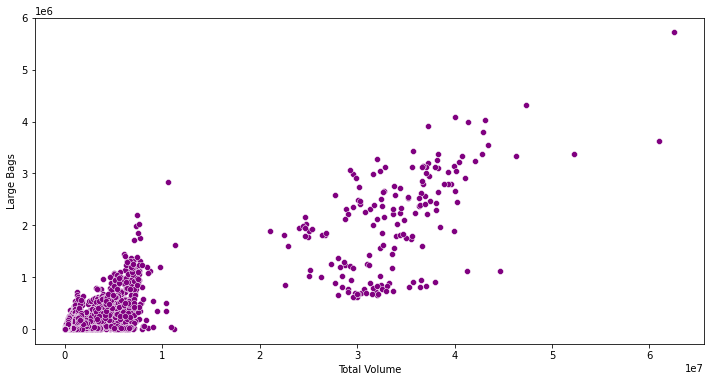

In [563]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=ava,x='Total Volume',y='Large Bags',color='purple')
plt.show()

### Observation-7

1. Both types of avocado was sold out in all the avilable year equally.


2. The sell of xlarge bags and total bags are high in the side of organic avocado and less in conventional side.


3. The total volumne is high in organic avocado side and very less in conventional side.


4. When the total bags sell is increasing the small bags sell is also increasing.


5. The Total volume is increasing with increase number of small bags.


6. 4046, 4770, small, large and Xlarge bags are directly prportional to total volume, means one will increase total volume will also increase.

# Now we are dividing our process in two ways...
## When target is region 
## when target is average price

.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## When target is average price

In [608]:
x=ava.iloc[:,0:-1]
y=ava.iloc[:,-1]

In [609]:
x.shape

(18249, 11)

In [610]:
y.shape

(18249,)

In [611]:
col=x.columns

### Removing Outliers

In [612]:
import scipy
from scipy.stats import zscore

In [613]:
z=np.abs(zscore(x))
z.shape

(18249, 11)

In [614]:
threshold=3
print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [615]:
x_new=x[(z<3).all(axis=1)]
x_new.shape

(17782, 11)

In [616]:
y=y[(z<3).all(axis=1)]
y.shape

(17782,)

In [617]:
loss_of_data=((18249-17782)/18249)*100
print("Loss Percent:",loss_of_data)

Loss Percent: 2.55904433119623


### We removed outliers and lost our 2.55% data which is less then 10%. So we can say that this percentage loss is under our maximum range and negligible.

### Removing skewness

In [618]:
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [619]:
from sklearn.preprocessing import power_transform

In [620]:
x=power_transform(x_new,method='yeo-johnson')

In [621]:
x=pd.DataFrame(x,columns=col)

In [622]:
x.skew()

Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year           -0.090116
region         -0.260077
dtype: float64

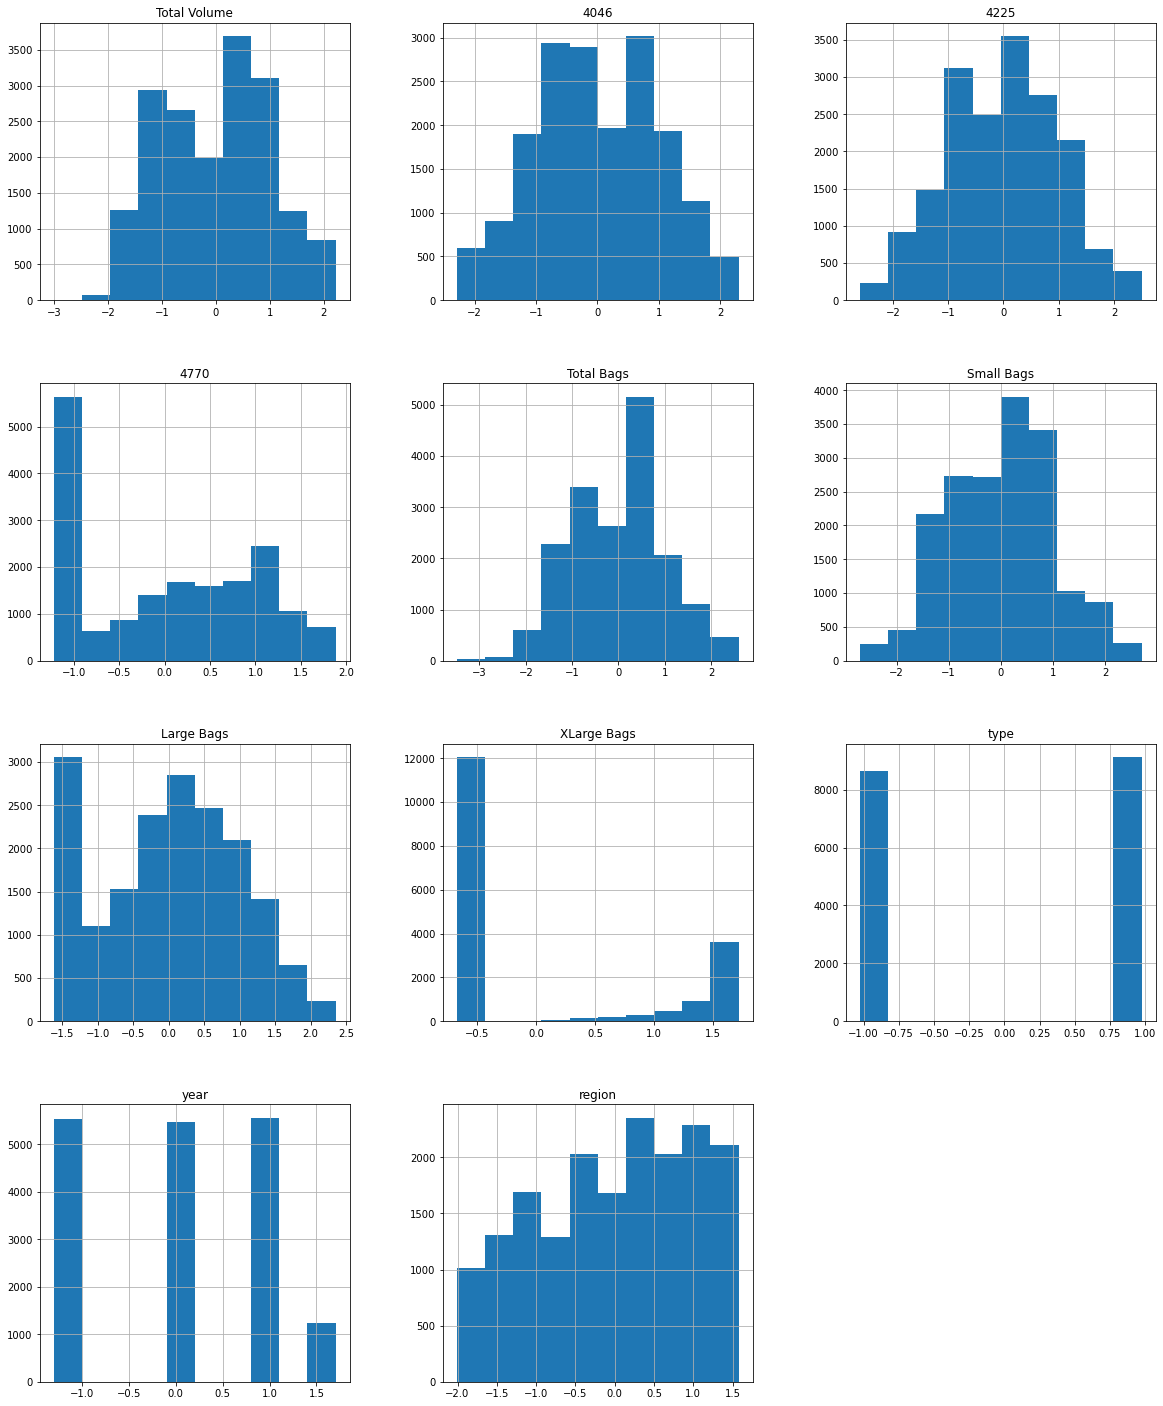

In [623]:
x.hist(figsize=(20,25))
plt.show()

### We removed skewness and now our data is equally distributed.

.

### Scaling the data 

In [624]:
from sklearn.preprocessing import MinMaxScaler

In [625]:
mm=MinMaxScaler()

In [626]:
x=mm.fit_transform(x)

In [627]:
x=pd.DataFrame(x,columns=col)

In [628]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.562696,0.357480,0.580002,0.325487,0.487023,0.438095,0.213184,0.0,0.0,0.0,0.0
1,0.548892,0.331291,0.563922,0.340736,0.493473,0.444755,0.215695,0.0,0.0,0.0,0.0
2,0.616363,0.341222,0.638444,0.404818,0.482295,0.433108,0.218893,0.0,0.0,0.0,0.0
3,0.580853,0.362907,0.603034,0.358141,0.458267,0.407914,0.233876,0.0,0.0,0.0,0.0
4,0.542545,0.351559,0.562471,0.361577,0.462650,0.411689,0.257100,0.0,0.0,0.0,0.0


# VIF:
### Variance inflation factor:

In [629]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [630]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [631]:
vif(x)

,Variables,VIF Factor
0,Total Volume,515.428134
1,4046,44.635281
2,4225,86.382859
3,4770,9.844984
4,Total Bags,379.832057
5,Small Bags,118.060223
6,Large Bags,10.405114
7,XLarge Bags,2.965273
8,type,4.581994
9,year,3.615818


The Vif factor of 'Total volume' and 'total bags' is very high, means both are highly correleted(0.96) with each other.So we can drop total volume column.

In [632]:
x.drop(['Total Volume'],axis=1,inplace=True)

In [633]:
vif(x)

,Variables,VIF Factor
0,4046,23.062094
1,4225,31.692564
2,4770,9.812628
3,Total Bags,220.530735
4,Small Bags,117.707511
5,Large Bags,10.081307
6,XLarge Bags,2.948150
7,type,4.373569
8,year,3.609795
9,region,5.313181


The vif factor od 'Total bags' and 'Small Bags' is high, means both are highly correleted(0.99) with each other.Because of this we are droping Total bags.

In [634]:
x.drop(['Total Bags'],axis=1,inplace=True)

In [635]:
vif(x)

,Variables,VIF Factor
0,4046,22.435422
1,4225,27.256243
2,4770,9.812611
3,Small Bags,31.873247
4,Large Bags,6.743353
5,XLarge Bags,2.946745
6,type,3.285464
7,year,3.498940
8,region,5.253184


The vif factor od 'Small Bags' and '4225' is high, means both are highly correleted(0.94) with each other.Because of this we are droping Total bags.

In [636]:
x.drop(['Small Bags'],axis=1,inplace=True)

In [637]:
vif(x)

,Variables,VIF Factor
0,4046,18.419201
1,4225,22.000821
2,4770,9.316333
3,Large Bags,6.709596
4,XLarge Bags,2.936467
5,type,3.216432
6,year,2.940432
7,region,5.249914


.

## Model learning phase-prediction phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use Regression model because our target column is numeric in nature.

For Regression model, Some matrix we are going to find like:

1. R2 score.
2. Mean absolute error.
3. Mean squared error.
4. Root mean squared error.


#### Models

1. Decision Tree Regressor
2. KNeighbors Regressor
3. Decision Tree regressor
4. RandomForestRegressor 
5. AdaBoostRegressor
6. GradientBoostingRegressor
7. XGboost regressor

### Importing important lib.

In [638]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xg

In [639]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Finding best random state

In [644]:
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score > max_score:
            max_score=r2score
            max_state=i
    print('max score is {} at random state {}'.format(max_score,max_state))       

## Linear Regression

Finding best random state by calling model_select function

In [645]:
model_select(LinearRegression)

max score is 0.48184788111395704 at random state 8


In [647]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=.22)

In [648]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print('Mean_squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(pred,y_test)))

Mean_squared error: 0.08908018934472578
Mean absolute error: 0.22940770345731193
r2_score: -0.23193137422040322
Root mean squared error: 0.2984630451910685


## Decision tree regressor

Finding best random state by calling model_select function

In [649]:
model_select(DecisionTreeRegressor)

max score is 0.6579748335553914 at random state 22


In [650]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=22)

In [651]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(pred,y_test))
print("Mean absoluate error :",mean_absolute_error(pred,y_test))
print("Means squred error:" ,mean_squared_error(pred,y_test))
print("Root mean squred error: ",np.sqrt(mean_squared_error(pred,y_test)))

r2 score :  0.6612812548596219
Mean absoluate error : 0.15622540250447225
Means squred error: 0.05514472271914132
Root mean squred error:  0.23482913515818543


## K neighbors regressor

Finding best random state for K neighbors regressor

In [663]:
model_select(KNeighborsRegressor)

max score is 0.7958169247932918 at random state 22


In [664]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)

In [665]:
Knn=KNeighborsRegressor()
Knn.fit(x_train,y_train)
pred=Knn.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.7956017329181106
Mean absoluate error : 0.12727804329491144
Means squred error: 0.03335943323025021
Root mean squred error:  0.18264564936031247


## RandomForestRegressor

Finding best random state by calling model_select function

In [666]:
model_select(RandomForestRegressor)

max score is 0.8180593574922203 at random state 3


In [667]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [668]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predi=rfr.predict(x_test)

In [671]:
print("r2 score:",r2_score(y_test,predi))
print("Mean absolute error",mean_absolute_error(y_test,predi))
print("Mean squared error:",mean_squared_error(y_test,predi))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))

r2 score: 0.8180755419967815
Mean absolute error 0.11946447521319464
Mean squared error: 0.029511724502078063
Root mean squared error: 0.17178976832768028


## Adaboost Regressor

Finding best random state by calling model_select function

In [677]:
model_select(AdaBoostRegressor)

max score is 0.5166405598620509 at random state 26


In [678]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=26)

In [680]:
adaa=AdaBoostRegressor()
adaa.fit(x_train,y_train)
pre=adaa.predict(x_test)

In [681]:
print("r2 score:",r2_score(y_test,pre))
print("Mean absolute error",mean_absolute_error(y_test,pre))
print("Mean squared error:",mean_squared_error(y_test,pre))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pre)))

r2 score: 0.49958320648043264
Mean absolute error 0.2291521218873577
Mean squared error: 0.0844621752308294
Root mean squared error: 0.29062376921172395


## GradientBoostingRegressor

Finding best random state by calling model_select function

In [682]:
model_select(GradientBoostingRegressor)

max score is 0.6627080845699338 at random state 23


In [683]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=23)

In [684]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
prt=gbr.predict(x_test)
print(gbr.score(x_train,y_train))

0.663582348325608


In [685]:
print("r2 score:",r2_score(y_test,prt))
print("Mean absolute error:",mean_absolute_error(prt,y_test))
print("Mean squared error:",mean_squared_error(prt,y_test))
print("Root mean squared error:",np.sqrt(mean_squared_error(prt,y_test)))

r2 score: 0.6627080845699338
Mean absolute error: 0.17460641265220053
Mean squared error: 0.05638102854656941
Root mean squared error: 0.2374468962664482


## Xgboost Regressor

Finding best random state by calling model_select function

In [686]:
model_select(xg.XGBRegressor)

max score is 0.8006070217912585 at random state 46


In [687]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=46)

In [688]:
xgbs=xg.XGBRegressor()
xgbs.fit(x_train,y_train)
pred=xgbs.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8006070217912585
Mean absolute error: 0.1307979926811957
Mean squared error: 0.0325539768732224
Root mean squared error: 0.18042720657711908


.

### From the above results we can conclude that the Random forest regressor is giving good r2 score(0.81) and least, root mean squared error(0.17), So we are choosing Random forest as a best model

#### r2 score: 0.81
#### Mean absolute error 0.11
#### Mean squared error: 0.02
#### Root mean squared error: 0.17

.

## Hyper Parameter tuning

### Grid search cv

In [704]:
parameter ={
       'n_estimators':[3,4,5,6,7],
      'criterion':['mse','mae'],
     'min_samples_split':[2,4,8],
     "max_features" : ["auto", "sqrt", "log2"]}

In [706]:
GSC=GridSearchCV(rfr,parameter,cv=10)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'mse',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 7}

In [707]:
GSC.best_estimator_

RandomForestRegressor(criterion='mse', max_features='log2', n_estimators=7)

In [711]:
GSC_pred=GSC.best_estimator_.predict(x_test)
r2_score(y_test,GSC_pred)

0.800343875519776

In [710]:
rfr=RandomForestRegressor(criterion='mse', max_features='log2', n_estimators=7)
rfr.fit(x_train,y_train)
predi=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,predi))
print("Mean absolute error",mean_absolute_error(y_test,predi))
print("Mean squared error:",mean_squared_error(y_test,predi))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))

r2 score: 0.7999132758774873
Mean absolute error 0.1278576904822752
Mean squared error: 0.032667241586131004
Root mean squared error: 0.1807408132828084


### We have done with Hyper parameter tuning and got 80% accuracy .

#### r2 score: 0.799
#### Mean absolute error: 0.12
#### Mean squared error: 0.03
#### Root mean squared error: 0.18

.

## Saving the model

In [712]:
import joblib

In [714]:
joblib.dump(rfr,'Avocado.pkl')

['Avocado.pkl']

## Prediction

In [715]:
model=joblib.load('Avocado.pkl')

In [716]:
prediction=model.predict(x_test)

In [717]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

,0,1,2,3,4,5,6,7,8,9,...,3903,3904,3905,3906,3907,3908,3909,3910,3911,3912
Predicted,1.257143,1.948571,1.308571,1.251429,1.235714,0.975714,1.647143,1.384286,1.20,1.47,...,1.155714,1.654286,1.79,1.257143,1.54,1.62,1.282857,1.242857,1.284286,1.228571
Original,1.340000,2.160000,1.380000,1.170000,1.280000,0.990000,1.590000,1.360000,1.22,1.36,...,1.110000,1.700000,1.62,1.270000,1.28,1.59,1.010000,1.210000,1.220000,1.310000


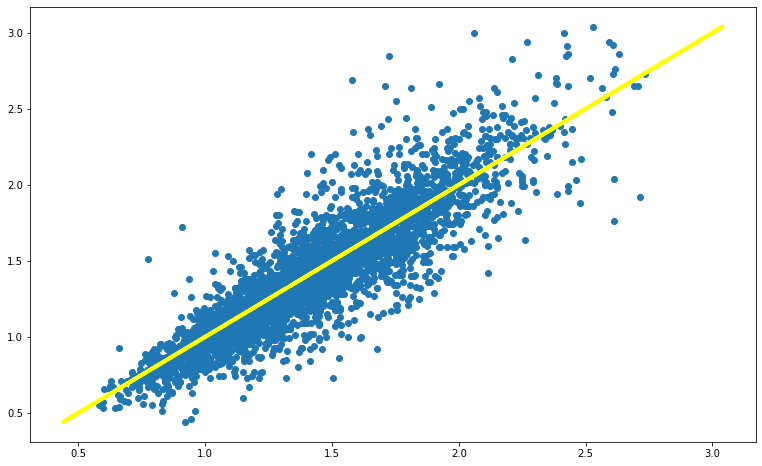

In [720]:
plt.figure(figsize=[13,8])
plt.scatter(prediction,y_test)
plt.plot(y_test,y_test,linewidth=4,color='yellow')
plt.show()

## When target is region 

### We have performed EDA of this side, here we will only do Preprocessing part.

In [3]:
av=pd.read_csv(r"C:\Users\ABC\OneDrive\Desktop\avocado.csv")
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
av['type']=le.fit_transform(av['type'])

In [7]:
av['region']=le.fit_transform(av['region'])

## Preprocessing 

In [8]:
av.drop(['Date'],axis=1,inplace=True)
av.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
x=av.iloc[:,0:-1]
y=av.iloc[:,-1]

In [10]:
x.shape

(18249, 11)

In [11]:
y.shape

(18249,)

In [12]:
colum=x.columns

### Removing Outliers

In [13]:
from scipy.stats import zscore

In [14]:
z=np.abs(zscore(x))
z.shape

(18249, 11)

In [15]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [16]:
x=x[(z<3).all(axis=1)]

In [17]:
y=y[(z<3).all(axis=1)]

In [18]:
x.shape

(17651, 11)

In [19]:
y.shape

(17651,)

### Removing skewness

In [20]:
from sklearn.preprocessing import power_transform

In [21]:
x.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
dtype: float64

In [22]:
x=power_transform(x,method='yeo-johnson')

In [23]:
x=pd.DataFrame(x,columns=colum)

In [24]:
x.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
dtype: float64

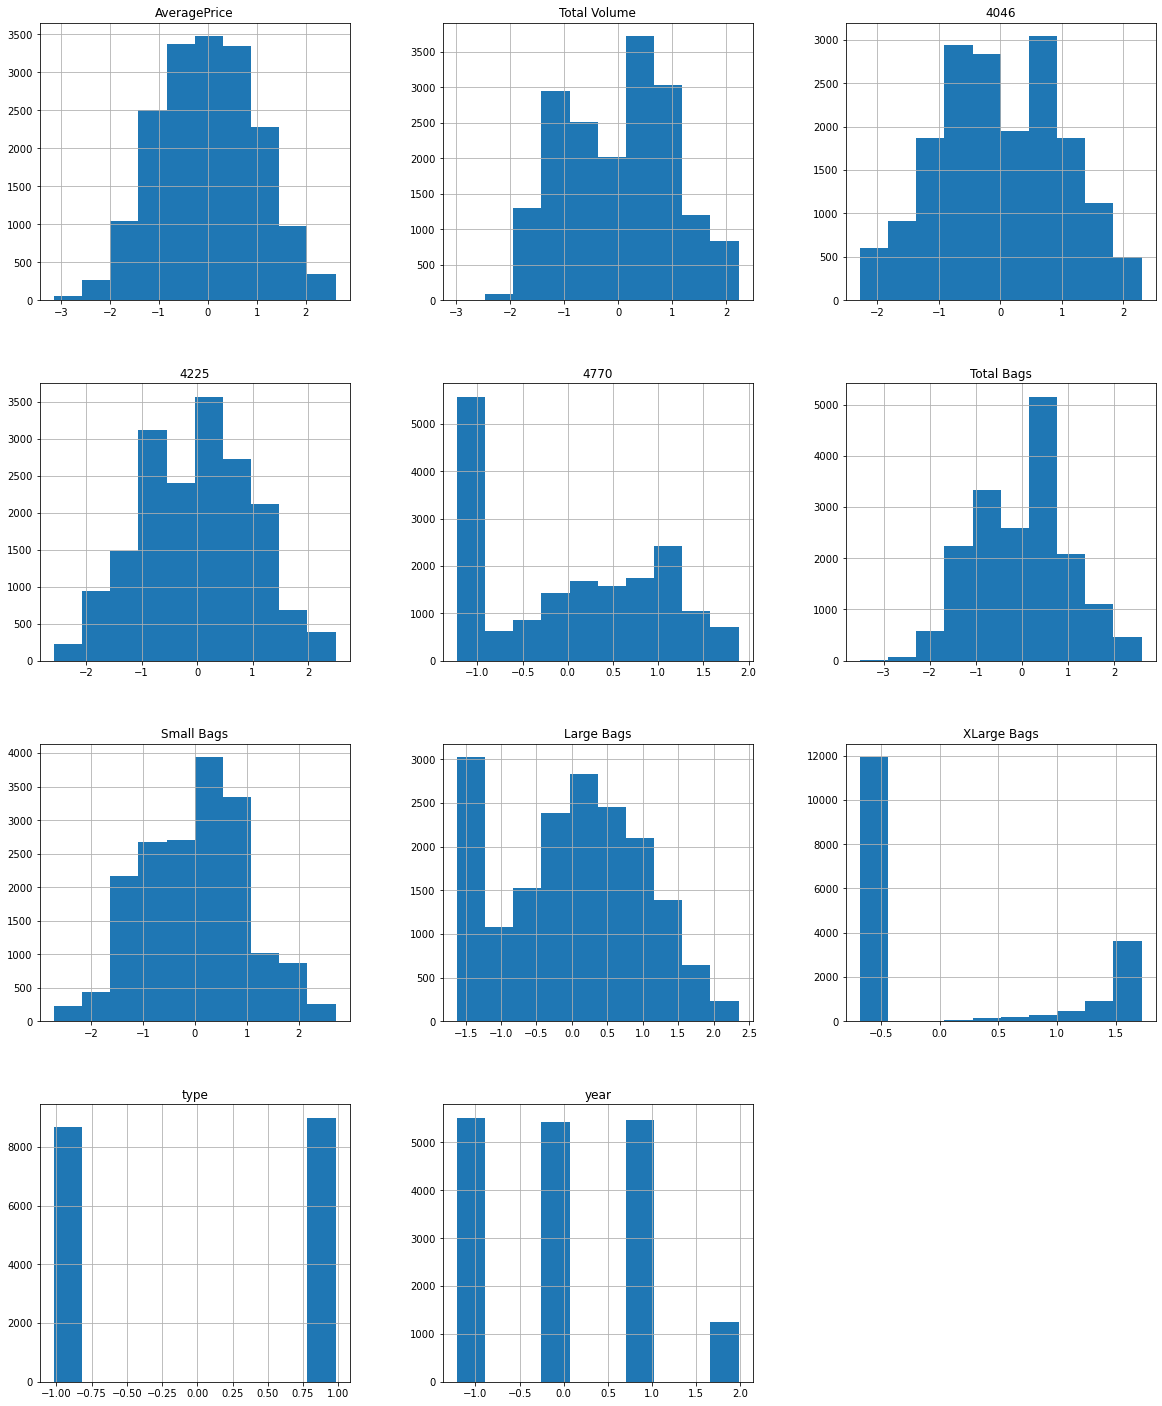

In [25]:
x.hist(figsize=(20,25))
plt.show()

### Adopting Scaling technique to scale the data

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mm=MinMaxScaler()

In [28]:
x=mm.fit_transform(x)

In [29]:
x=pd.DataFrame(x,columns=colum)

In [30]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0.525774,0.558933,0.354981,0.577572,0.322762,0.487692,0.436620,0.212073,0.0,0.0,0.0
1,0.535069,0.545104,0.328863,0.561453,0.337945,0.494141,0.443280,0.214576,0.0,0.0,0.0
2,0.320560,0.612752,0.338765,0.636189,0.401812,0.482965,0.431634,0.217764,0.0,0.0,0.0
3,0.402198,0.577132,0.360395,0.600666,0.355282,0.458939,0.406446,0.232701,0.0,0.0,0.0
4,0.502176,0.538747,0.349074,0.560000,0.358705,0.463321,0.410220,0.255861,0.0,0.0,0.0


# VIF:
### Variance inflation factor:

In [31]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [33]:
vif(x)

,Variables,VIF Factor
0,AveragePrice,15.133585
1,Total Volume,531.113502
2,4046,42.939642
3,4225,93.336264
4,4770,9.894494
5,Total Bags,384.968123
6,Small Bags,117.302814
7,Large Bags,11.433853
8,XLarge Bags,2.972408
9,type,7.622111


We are dropping Total volume becasue it vif is highest as compare to total bags and they are highly correleted with each others.

In [34]:
x.drop(['Total Volume'],axis=1,inplace=True)

In [35]:
vif(x)

,Variables,VIF Factor
0,AveragePrice,15.025361
1,4046,21.595950
2,4225,35.227195
3,4770,9.866915
4,Total Bags,219.562158
5,Small Bags,116.986495
6,Large Bags,11.037954
7,XLarge Bags,2.957208
8,type,7.476773
9,year,3.399945


We are dropping Total Bags becasue it vif is highest as compare to Small Bags and they are highly correleted with each others.

In [36]:
x.drop(['Total Bags'],axis=1,inplace=True)

In [37]:
vif(x)

,Variables,VIF Factor
0,AveragePrice,14.780804
1,4046,20.717005
2,4225,31.733656
3,4770,9.866269
4,Small Bags,32.144575
5,Large Bags,7.355500
6,XLarge Bags,2.956774
7,type,6.684926
8,year,3.339889


Now we are dropping Small Bags becasue it vif is highest as compare to 4225 and they are highly correleted with each others.

In [38]:
x.drop(['Small Bags'],axis=1,inplace=True)

In [39]:
vif(x)

,Variables,VIF Factor
0,AveragePrice,14.698490
1,4046,16.600288
2,4225,27.000705
3,4770,9.397862
4,Large Bags,7.341440
5,XLarge Bags,2.946387
6,type,6.659274
7,year,2.884603


So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use classification model because our target column is catagorical in nature.

For Regression model, Some matrix we are going to find like:

1. Confusion matrix.
2. Accuracy Score.
3. Classification report.


#### Models

1. Decision Tree Classifier
2. KNeighbors Classifier
3. Decision Tree Classifier
4. RandomForestClassifier 
5. AdaBoostClassifier
6. GradientBoostingClassifier
7. XGboost classifier

In [40]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xg

### Creating a function for finding Best random state 

In [41]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))       

## Logistic Regression

Finding best random state by calling model_select function

In [63]:
model_select(LogisticRegression)

Max score is 0.38079299691040164 at random state 31


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=31)

In [55]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.38079299691040164
[[26  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  1  0]
 [ 0  0  0 ...  4 40  0]
 [ 0  3  1 ...  0  0  3]]
              precision    recall  f1-score   support

           0       0.34      0.35      0.35        74
           1       0.26      0.53      0.34        72
           2       0.49      0.51      0.50        72
           3       0.26      0.33      0.29        57
           4       0.31      0.23      0.26        75
           5       0.09      0.04      0.05        75
           6       0.68      0.72      0.70        74
           7       0.42      0.81      0.55        68
           8       0.52      0.67      0.58        78
           9       0.31      0.66      0.42        65
          10       0.59      0.21      0.31        77
          11       0.31      0.52      0.38        79
          12       0.19      0.37      0.25        62
          13       0.31      0.25      0.28        75
   

In [57]:
cvr=cross_val_score(lr,x,y,cv=19)
print("Cross validation when cv=",cvr.mean())

Cross validation when cv= 0.3400940456631352


In [96]:
cvlr=19
Modellr=38
Cslr= 34
Diffrencelr= 38-34

## Kneighbor Classifier

Finding best random state by calling model_select function

In [68]:
model_select(KNeighborsClassifier)

Max score is 0.7986611740473738 at random state 58


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=58)

In [60]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7986611740473738
[[76  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  1 63  0]
 [ 0  2  2 ...  0  0 42]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        94
           1       0.58      0.78      0.67        69
           2       0.84      0.93      0.88        68
           3       0.81      0.80      0.80        79
           4       0.65      0.70      0.68        64
           5       0.69      0.65      0.67        75
           6       0.97      0.98      0.98        60
           7       0.82      0.86      0.84        70
           8       0.91      0.97      0.94        76
           9       0.80      0.73      0.76        73
          10       0.57      0.78      0.66        67
          11       0.76      0.91      0.83        69
          12       0.95      0.87      0.91        79
          13       0.65      0.65      0.65        69
    

In [61]:
for i in range(12,20):
    cvr=cross_val_score(knn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 12 --- 0.5710726733476078
Cross validation when cv= 13 --- 0.5872147399964218
Cross validation when cv= 14 --- 0.6024522973344771
Cross validation when cv= 15 --- 0.599557514877942
Cross validation when cv= 16 --- 0.6052650380385509
Cross validation when cv= 17 --- 0.6211244955736805
Cross validation when cv= 18 --- 0.6213009770676875
Cross validation when cv= 19 --- 0.6354314203161293


In [62]:
cvknn=19
Modelknn= 79 
Csknn= 63.54
Diffrenceknn= 79-63.54 

### Naive bayes classifier

Finding best random state by calling model_select function

In [73]:
model_select(MultinomialNB)

Max score is 0.04866117404737384 at random state 44


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=44)

In [64]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
pred=mn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.04866117404737384
[[24  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  5]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.06      0.29      0.09        84
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        72
           5       0.00      0.00      0.00        77
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00        74
           8       0.00      0.00      0.00        77
           9       1.00      0.01      0.02        79
          10       0.00      0.00      0.00        70
          11       0.07      0.12      0.09        60
          12       0.09      0.19      0.12        90
          13       0.01      0.01      0.01        68
   

In [65]:
for i in range(3,15):
    cvr=cross_val_score(mn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.027136823469699322
Cross validation when cv= 4 --- 0.02555060421703863
Cross validation when cv= 5 --- 0.029743598383560256
Cross validation when cv= 6 --- 0.02764667126345278
Cross validation when cv= 7 --- 0.029175117075925544
Cross validation when cv= 8 --- 0.03098841525008411
Cross validation when cv= 9 --- 0.031159166783193096
Cross validation when cv= 10 --- 0.03229256430081585
Cross validation when cv= 11 --- 0.03427239745439573
Cross validation when cv= 12 --- 0.03297184724784996
Cross validation when cv= 13 --- 0.03314026377333096
Cross validation when cv= 14 --- 0.032970314744983374


In [66]:
cvgn=11
Modelgn= 4 
Csgn= 3.4
Diffrencegn=4-3.4

### Decision tree classifier

Finding best random state by calling model_select function

In [78]:
model_select(DecisionTreeClassifier)

Max score is 0.7711122554067971 at random state 97


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=97)

In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7690525231719877
[[48  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  4]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  5  0 ...  0  0 48]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        74
           1       0.61      0.67      0.64        81
           2       0.89      0.92      0.91        79
           3       0.75      0.74      0.74        76
           4       0.68      0.62      0.65        69
           5       0.71      0.73      0.72        82
           6       0.91      0.94      0.93        54
           7       0.80      0.89      0.85        83
           8       0.96      0.90      0.93        59
           9       0.78      0.77      0.78        61
          10       0.75      0.63      0.69        71
          11       0.77      0.82      0.80        83
          12       0.93      0.81      0.86        83
          13       0.67      0.71      0.69        73
    

In [69]:
for i in range(3,20):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.4285853199248015
Cross validation when cv= 4 --- 0.4735125517227494
Cross validation when cv= 5 --- 0.5206521597858866
Cross validation when cv= 6 --- 0.5181543194880386
Cross validation when cv= 7 --- 0.5804661709432767
Cross validation when cv= 8 --- 0.5822806698459242
Cross validation when cv= 9 --- 0.5891955078961022
Cross validation when cv= 10 --- 0.5960518320559258
Cross validation when cv= 11 --- 0.6102635651031019
Cross validation when cv= 12 --- 0.6128823929299796
Cross validation when cv= 13 --- 0.6081753753619376
Cross validation when cv= 14 --- 0.6279464072173939
Cross validation when cv= 15 --- 0.6276014002315738
Cross validation when cv= 16 --- 0.6298654772228574
Cross validation when cv= 17 --- 0.6473153933028089
Cross validation when cv= 18 --- 0.6445313565453366
Cross validation when cv= 19 --- 0.64670556908957


In [70]:
cvdt=17
Modeldt= 76
Csdt=64.73
Diffrencedt= 76-64.73

### Support vector classifier

Finding best random state by calling model_select function

In [ ]:
model_select(SVC)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=91)

In [72]:
svc=DecisionTreeClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7546343975283213
[[49  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  1]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  1  1 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        85
           1       0.66      0.59      0.62        78
           2       0.84      0.91      0.87        65
           3       0.80      0.76      0.78        86
           4       0.73      0.74      0.74        82
           5       0.59      0.59      0.59        79
           6       0.96      0.98      0.97        65
           7       0.82      0.79      0.80        75
           8       0.98      0.97      0.98        62
           9       0.80      0.75      0.77        73
          10       0.62      0.56      0.59        63
          11       0.82      0.84      0.83        77
          12       0.89      0.91      0.90        88
          13       0.74      0.70      0.72        82
    

In [73]:
for i in range(10,20):
    cvr=cross_val_score(svc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 10 --- 0.5980912996191838
Cross validation when cv= 11 --- 0.6107726647696815
Cross validation when cv= 12 --- 0.6106158212208518
Cross validation when cv= 13 --- 0.6127640715801379
Cross validation when cv= 14 --- 0.6264727990059359
Cross validation when cv= 15 --- 0.6269210317941959
Cross validation when cv= 16 --- 0.63184988527665
Cross validation when cv= 17 --- 0.6474280243789283
Cross validation when cv= 18 --- 0.6412987349204038
Cross validation when cv= 19 --- 0.6476120333125601


In [74]:
cvsvm=19
Modelsvm=75
Cssvm=64.76
Diffrencesvm= 75-64.76

### Ensamble technique --

### Bagging and boosting

#### Random forest classifier
Finding best random state by calling model_select function

In [122]:
model_select(RandomForestClassifier)

Max score is 0.8838825952626158 at random state 18


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=18)

In [76]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.88259526261586
[[57  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  2  1 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78        77
           1       0.81      0.82      0.82        79
           2       0.96      0.96      0.96        81
           3       0.85      0.84      0.85        63
           4       0.87      0.83      0.85        66
           5       0.82      0.85      0.84        72
           6       0.97      0.96      0.96        67
           7       0.92      0.92      0.92        75
           8       0.96      0.96      0.96        55
           9       0.92      0.85      0.88        78
          10       0.79      0.74      0.77        66
          11       0.93      0.97      0.95        80
          12       0.97      0.96      0.97        80
          13       0.78      0.81      0.79        72
      

In [77]:
for i in range(3,20):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.5351488341720888
Cross validation when cv= 4 --- 0.6046069302166865
Cross validation when cv= 5 --- 0.6388294691373773
Cross validation when cv= 6 --- 0.640528166564229
Cross validation when cv= 7 --- 0.7064061902675283
Cross validation when cv= 8 --- 0.7156398796625425
Cross validation when cv= 9 --- 0.7170027912627878
Cross validation when cv= 10 --- 0.7179690983930008
Cross validation when cv= 11 --- 0.7382966048486828
Cross validation when cv= 12 --- 0.7397860526490224
Cross validation when cv= 13 --- 0.7440865055372498
Cross validation when cv= 14 --- 0.7522432525746222
Cross validation when cv= 15 --- 0.758354429282333
Cross validation when cv= 16 --- 0.7545010642910639
Cross validation when cv= 17 --- 0.7674682072197991
Cross validation when cv= 18 --- 0.7640636376874909
Cross validation when cv= 19 --- 0.7693615092629313


In [79]:
cvrf=19
Modelrf= 86 
Csrf=  76.93
Diffrencerf =86-76.93

### AdaBoostClassifier

Finding best random state by calling model_select function

In [127]:
model_select(AdaBoostClassifier)

Max score is 0.09165808444902163 at random state 50


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=50)

In [81]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.09165808444902163
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  3]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0 19 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        70
           2       0.10      0.43      0.16        69
           3       0.00      0.00      0.00        70
           4       0.14      0.30      0.19        79
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        58
           7       1.00      0.01      0.03        71
           8       0.00      0.00      0.00        83
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00        76
          11       0.15      0.90      0.26        94
          12       0.50      0.01      0.02        79
          13       0.00      0.00      0.00        74
   

In [83]:
cvr=cross_val_score(ada,x,y,cv=5)
print("Cross validation when cv=",cvr.mean())

Cross validation when cv= 0.06317097532739162


In [84]:
cvada=5
Modelada = 9  
Csada= 6.3
Diffrenceada=9-6.2

### Xg boost Classifier

Finding best random state by calling model_select function

In [ ]:
model_select(xg.XGBClassifier)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=28)

In [44]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8349639546858908
[[60  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  1 57  0]
 [ 0  0  1 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        81
           1       0.68      0.72      0.70        78
           2       0.96      0.96      0.96        67
           3       0.75      0.83      0.79        65
           4       0.74      0.74      0.74        85
           5       0.77      0.70      0.73        63
           6       0.93      0.97      0.95        73
           7       0.86      0.97      0.91        63
           8       0.97      0.98      0.98        60
           9       0.91      0.91      0.91        74
          10       0.71      0.74      0.72        69
          11       0.91      0.83      0.87        72
          12       0.97      0.90      0.93        77
          13       0.74      0.83      0.79        66
    

In [91]:
cvr=cross_val_score(xb,x,y,cv=7)
print("Cross validation when cv=",cvr.mean())

Cross validation when cv= 0.6664093215494434


In [92]:
cvxg=7
Modelxg=83
Csxg=66.64
Diffrencexg=83-67.77

## Comparison of all the models

In [97]:
kk={'CV':[cvlr,cvknn,cvgn,cvdt,cvsvm,cvrf,cvada,cvxg],
                 'Model_accuracy':[Modellr,Modelknn,Modelgn,Modeldt,Modelsvm,Modelrf,Modelada,Modelxg],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdt,Cssvm,Csrf,Csada,Csxg],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedt,Diffrencesvm,Diffrencerf,Diffrenceada,Diffrencexg]
 }

In [98]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GussianNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','xgboost'])

In [99]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,19,38,34.00,4.00
kneighbour,19,79,63.54,15.46
GussianNB,11,4,3.40,0.60
Decision tree,17,76,64.73,11.27
Support vector machine,19,75,64.76,10.24
Random forest,19,86,76.93,9.07
Adaboost,5,9,6.30,2.80
xgboost,7,83,66.64,15.23


## Best Model

### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is good as compare to others.That is why we are choosing RFC
### Model accuracy is : 86
### Cross_validation score : 76.93
### Diffrence : 9.07

.

## Hyper Parameter tuning
### Grid search cv

In [108]:
parameter={'n_estimators':[100,200],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,6,8],
            'max_features':['sqrt', 'log2']
           }

In [ ]:
GSC=GridSearchCV(rfc,parameter,cv=5)
GSC.fit(x_train,y_train)
GSC.best_params_

In [ ]:
GSC.best_estimator_

In [ ]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)